In [1]:
# 주요 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# 주피터 셸에서 모두 출력하는 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 그래프에 한글 표시
plt.rcParams['font.family'] = 'Malgun Gothic'    # windows
plt.rcParams['font.family'] = 'AppleGothic'    # mac

# 전국 5대 범죄 발생 현황 
: 어떤 범죄가 어느 시도에서 많이 발생하는가?  
: 전국의 범죄 현황을 한눈에 확인 

In [2]:
kor_criminal = pd.read_csv('/Users/yeondyu/Desktop/Coding/Mon_Tue_Wed/dataset/criminal/범죄_발생지_20240117090102.csv', encoding='CP949', header=1, index_col=0)
kor_criminal = kor_criminal.drop('계', axis=1)
kor_criminal = kor_criminal.drop(['죄종별(1)', '계'])
kor_criminal.head()

,죄종별(2),서울,부산,대구,인천,광주,대전,울산,세종,경기도,...,경상남도.2,경상남도.3,경상남도.4,경상남도.5,경상남도.6,경상남도.7,제주특별자치도,제주특별자치도.1,기타도시,도시이외
죄종별(1),,,,,,,,,,,,,,,,,,,,,
강력범죄,소계,6250,1693,1027,1599,631,810,500,121,358,...,39,48,113,154,380,74,124,326,46,1502
강력범죄,살인기수,35,29,16,14,1,6,8,2,6,...,1,2,1,2,5,-,1,3,4,19
강력범죄,살인미수등,68,24,15,38,2,11,7,3,8,...,2,-,3,1,11,1,4,4,1,43
강력범죄,강도,118,43,31,30,10,17,10,2,4,...,1,1,-,-,12,5,1,4,1,28
강력범죄,강간,1200,347,215,340,152,200,112,26,63,...,6,12,36,41,77,19,17,78,18,375


## 데이터 처리

In [3]:
# 5대 범죄 데이터만 추출
kor_criminal = kor_criminal[:11]
kor_criminal.iloc[1, 0] = '살인'
kor_criminal.iloc[9, 0] = '절도'
kor_criminal.iloc[10, 0] = '폭력'
kor_criminal = kor_criminal.iloc[[1, 3, 4, 9, 10]]
kor_criminal = kor_criminal.T
kor_criminal

죄종별(1),강력범죄,강력범죄,강력범죄,절도범죄,폭력범죄
죄종별(2),살인,강도,강간,절도,폭력
서울,35,118,1200,37594,46710
부산,29,43,347,13699,17242
대구,16,31,215,9792,11360
인천,14,30,340,8895,15295
...,...,...,...,...,...
경상남도.7,-,5,19,387,752
제주특별자치도,1,1,17,886,1409
제주특별자치도.1,3,4,78,2247,3978
기타도시,4,1,18,43,638


In [4]:
kor_criminal.columns = ['살인', '강도', '강간·강제추행', '절도', '폭력']
kor_criminal = kor_criminal.drop('죄종별(2)')
kor_criminal

,살인,강도,강간·강제추행,절도,폭력
서울,35,118,1200,37594,46710
부산,29,43,347,13699,17242
대구,16,31,215,9792,11360
인천,14,30,340,8895,15295
광주,1,10,152,5204,6302
...,...,...,...,...,...
경상남도.7,-,5,19,387,752
제주특별자치도,1,1,17,886,1409
제주특별자치도.1,3,4,78,2247,3978
기타도시,4,1,18,43,638


In [5]:
# -로 입력되어 있는 데이터를 0으로 변경
kor_criminal = kor_criminal.replace('-', 0)
kor_criminal

,살인,강도,강간·강제추행,절도,폭력
서울,35,118,1200,37594,46710
부산,29,43,347,13699,17242
대구,16,31,215,9792,11360
인천,14,30,340,8895,15295
광주,1,10,152,5204,6302
...,...,...,...,...,...
경상남도.7,0,5,19,387,752
제주특별자치도,1,1,17,886,1409
제주특별자치도.1,3,4,78,2247,3978
기타도시,4,1,18,43,638


In [6]:
kor_criminal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 서울 to 도시이외
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   살인       87 non-null     object
 1   강도       87 non-null     object
 2   강간·강제추행  87 non-null     object
 3   절도       87 non-null     object
 4   폭력       87 non-null     object
dtypes: object(5)
memory usage: 4.1+ KB


In [7]:
# 데이터 타입을 숫자형으로 변경하고, 자치구별 합계 구하기
kor_criminal = kor_criminal.astype('int')
kor_criminal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 서울 to 도시이외
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   살인       87 non-null     int64
 1   강도       87 non-null     int64
 2   강간·강제추행  87 non-null     int64
 3   절도       87 non-null     int64
 4   폭력       87 non-null     int64
dtypes: int64(5)
memory usage: 4.1+ KB


In [8]:
kor_criminal.index

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기도', '경기도.1', '경기도.2',
       '경기도.3', '경기도.4', '경기도.5', '경기도.6', '경기도.7', '경기도.8', '경기도.9', '경기도.10',
       '경기도.11', '경기도.12', '경기도.13', '경기도.14', '경기도.15', '경기도.16', '경기도.17',
       '경기도.18', '경기도.19', '경기도.20', '경기도.21', '경기도.22', '경기도.23', '경기도.24',
       '경기도.25', '경기도.26', '경기도.27', '강원도', '강원도.1', '강원도.2', '강원도.3', '강원도.4',
       '강원도.5', '강원도.6', '충청북도', '충청북도.1', '충청북도.2', '충청남도', '충청남도.1',
       '충청남도.2', '충청남도.3', '충청남도.4', '충청남도.5', '충청남도.6', '충청남도.7', '전라북도',
       '전라북도.1', '전라북도.2', '전라북도.3', '전라북도.4', '전라북도.5', '전라남도', '전라남도.1',
       '전라남도.2', '전라남도.3', '전라남도.4', '경상북도', '경상북도.1', '경상북도.2', '경상북도.3',
       '경상북도.4', '경상북도.5', '경상북도.6', '경상북도.7', '경상북도.8', '경상북도.9', '경상남도',
       '경상남도.1', '경상남도.2', '경상남도.3', '경상남도.4', '경상남도.5', '경상남도.6', '경상남도.7',
       '제주특별자치도', '제주특별자치도.1', '기타도시', '도시이외'],
      dtype='object')

In [9]:
# 도시명 하나로 합치기
new_name_list = ['경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']

def name_change(df):
    df1 = pd.DataFrame()
    for name in new_name_list:
        df2 = df[df.index.str.contains(name)]
        df2 = df2.sum()
        df2 =  pd.DataFrame(df2, columns = [name]).T
        df1 = pd.concat([df1, df2])
    return df1

new_kor_criminal = name_change(kor_criminal)
new_kor_criminal

,살인,강도,강간·강제추행,절도,폭력
경기도,65,107,1148,40974,62696
강원도,10,14,131,3512,5565
충청북도,5,21,149,4576,5490
충청남도,13,22,214,6304,7216
전라북도,12,10,151,4982,6013
전라남도,9,10,117,3926,5681
경상북도,10,11,213,8469,8905
경상남도,13,26,264,11286,13144
제주특별자치도,4,5,95,3133,5387


In [10]:
kor_criminal_all = pd.concat([kor_criminal[:8], new_kor_criminal])
kor_criminal_all

,살인,강도,강간·강제추행,절도,폭력
서울,35,118,1200,37594,46710
부산,29,43,347,13699,17242
대구,16,31,215,9792,11360
인천,14,30,340,8895,15295
광주,1,10,152,5204,6302
대전,6,17,200,6034,7764
울산,8,10,112,3283,5042
세종,2,2,26,1110,910
경기도,65,107,1148,40974,62696
강원도,10,14,131,3512,5565


In [11]:
# 지역별 합계 구하기
kor_criminal_all['합계'] = kor_criminal_all.sum(axis=1)
kor_criminal_all

,살인,강도,강간·강제추행,절도,폭력,합계
서울,35,118,1200,37594,46710,85657
부산,29,43,347,13699,17242,31360
대구,16,31,215,9792,11360,21414
인천,14,30,340,8895,15295,24574
광주,1,10,152,5204,6302,11669
대전,6,17,200,6034,7764,14021
울산,8,10,112,3283,5042,8455
세종,2,2,26,1110,910,2050
경기도,65,107,1148,40974,62696,104990
강원도,10,14,131,3512,5565,9232


In [12]:
# 5대 범죄 건수 높은 지역 5곳
kor_criminal_all['합계'].sort_values(ascending=False)[:5]

경기도     104990
서울       85657
부산       31360
경상남도     24733
인천       24574
Name: 합계, dtype: int64

=> 경기도가 104990건으로 5대 범죄 건수가 제일 높고, 서울, 부산, 경상남도, 인천 순으로 높음

## 데이터 시각화

### 히트맵

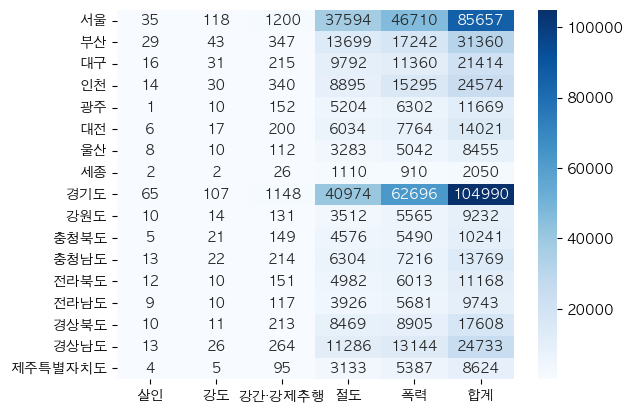

In [13]:
sns.heatmap(kor_criminal_all, annot=True, fmt='.0f', cmap='Blues');

### 수평 막대 그래프

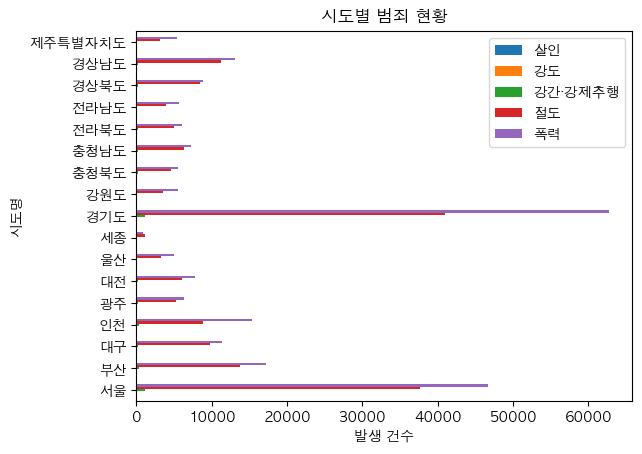

In [14]:
kor_criminal_all.plot(kind='barh', y=['살인', '강도', '강간·강제추행', '절도', '폭력']);
plt.title('시도별 범죄 현황');
plt.xlabel('발생 건수');
plt.ylabel('시도명');

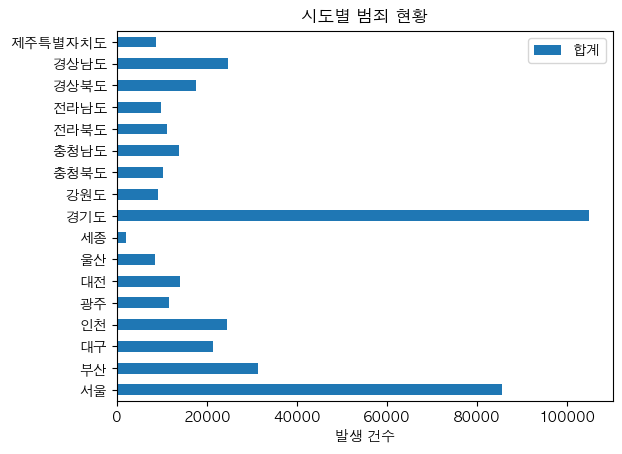

In [15]:
kor_criminal_all.plot(kind='barh', y=['합계']);
plt.title('시도별 범죄 현황');
plt.xlabel('발생 건수');

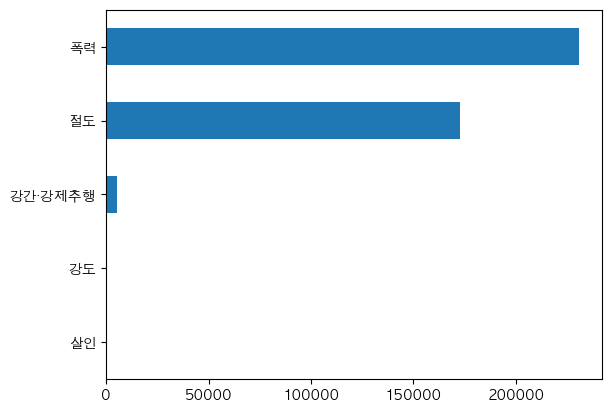

In [16]:
# 범죄별 발생 건수
criminal = kor_criminal_all[['살인', '강도', '강간·강제추행', '절도', '폭력']].sum()
criminal.plot(kind='barh');

=> 대부분의 시도에서 폭력과 절도가 많이 발생

∴ 경기도에서 범죄가 제일 많이 발생하고, 폭력 범죄가 제일 많이 발생한다.

# 서울시 5대 범죄 발생 현황

In [17]:
seoul_criminal = pd.read_csv('/Users/yeondyu/Desktop/Coding/Mon_Tue_Wed/dataset/criminal/5대+범죄+발생현황_20240117090131.csv', header=2, index_col=1)
seoul_criminal.head()

,자치구별(1),소계,소계.1,살인,살인.1,강도,강도.1,강간·강제추행,강간·강제추행.1,절도,절도.1,폭력,폭력.1
자치구별(2),,,,,,,,,,,,,
자치구별(2),자치구별(1),발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
소계,합계,90399,65097,104,98,117,112,5816,5344,37579,20205,46783,39338
종로구,합계,3138,3284,2,3,8,8,228,988,1313,932,1587,1353
중구,합계,3071,2119,1,2,5,4,194,123,1365,724,1506,1266
용산구,합계,2967,2093,5,3,7,7,280,238,978,508,1697,1337


## 데이터 처리

In [18]:
seoul_criminal = seoul_criminal.drop(['자치구별(1)', '소계', '소계.1'], axis = 1).T
seoul_criminal = seoul_criminal.loc[::2]
seoul_criminal = seoul_criminal.drop(['자치구별(2)', '소계'], axis=1).T
seoul_criminal = seoul_criminal.rename_axis(index={'자치구별(2)': '자치구'})
seoul_criminal

,살인,강도,강간·강제추행,절도,폭력
자치구,,,,,
종로구,2,8,228,1313,1587
중구,1,5,194,1365,1506
용산구,5,7,280,978,1697
성동구,2,2,125,979,1086
광진구,6,-,230,1670,1713
동대문구,4,2,125,1556,1566
중랑구,2,2,150,1508,1937
성북구,3,1,158,1143,1444
강북구,5,5,177,872,1773


In [19]:
# -로 입력되어 있는 데이터를 0으로 변경
seoul_criminal = seoul_criminal.replace('-', 0)
seoul_criminal

,살인,강도,강간·강제추행,절도,폭력
자치구,,,,,
종로구,2,8,228,1313,1587
중구,1,5,194,1365,1506
용산구,5,7,280,978,1697
성동구,2,2,125,979,1086
광진구,6,0,230,1670,1713
동대문구,4,2,125,1556,1566
중랑구,2,2,150,1508,1937
성북구,3,1,158,1143,1444
강북구,5,5,177,872,1773


In [20]:
seoul_criminal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   살인       25 non-null     object
 1   강도       25 non-null     object
 2   강간·강제추행  25 non-null     object
 3   절도       25 non-null     object
 4   폭력       25 non-null     object
dtypes: object(5)
memory usage: 1.2+ KB


In [21]:
# 데이터 타입을 숫자형으로 변경
seoul_criminal = seoul_criminal.astype('int')
seoul_criminal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   살인       25 non-null     int64
 1   강도       25 non-null     int64
 2   강간·강제추행  25 non-null     int64
 3   절도       25 non-null     int64
 4   폭력       25 non-null     int64
dtypes: int64(5)
memory usage: 1.2+ KB


In [22]:
# 자치구별 합계 구하기
seoul_criminal['범죄 합계'] = seoul_criminal.sum(axis=1)
seoul_criminal = seoul_criminal.sort_values('자치구')
seoul_criminal

,살인,강도,강간·강제추행,절도,폭력,범죄 합계
자치구,,,,,,
강남구,12,11,667,2495,3762,6947
강동구,5,5,157,1672,1872,3711
강북구,5,5,177,872,1773,2832
강서구,3,7,261,1991,2401,4663
관악구,10,9,327,1966,2567,4879
광진구,6,0,230,1670,1713,3619
구로구,11,8,217,1565,2056,3857
금천구,2,3,127,1118,1327,2577
노원구,3,3,180,1504,2206,3896


In [23]:
seoul_criminal.sort_values('범죄 합계', ascending=False)[:5]

,살인,강도,강간·강제추행,절도,폭력,범죄 합계
자치구,,,,,,
강남구,12,11,667,2495,3762,6947
송파구,2,5,290,2201,2669,5167
관악구,10,9,327,1966,2567,4879
영등포구,5,10,327,2062,2415,4819
강서구,3,7,261,1991,2401,4663


=> 강남구가 6947건으로 5대 범죄 건수가 제일 높고, 송파구, 관악구, 영등포구, 강서구 순으로 높음

## 데이터 시각화

### 히트맵

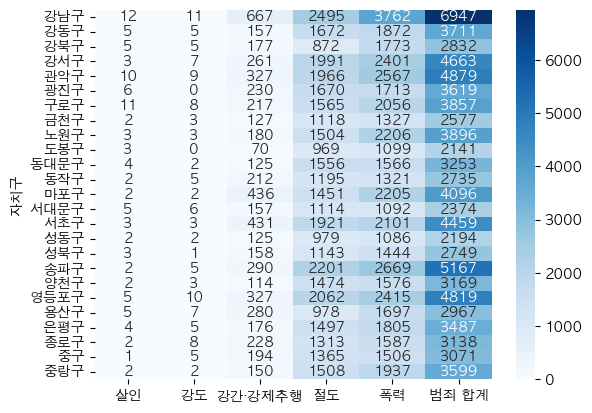

In [24]:
sns.heatmap(seoul_criminal, annot=True, fmt='.0f', cmap='Blues');

### 수평 막대 그래프

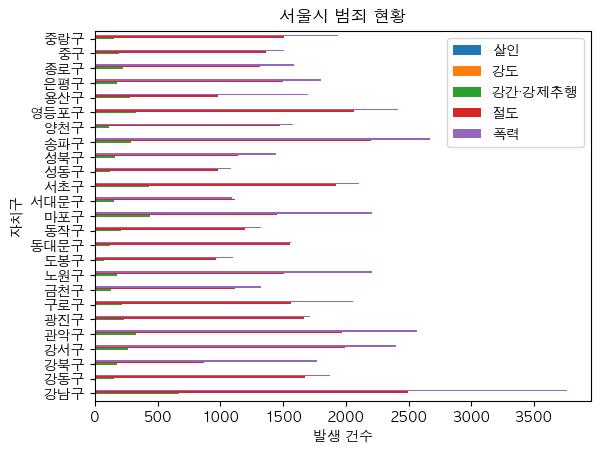

In [25]:
seoul_criminal.plot(kind='barh', y=['살인', '강도', '강간·강제추행', '절도', '폭력']);
plt.title('서울시 범죄 현황');
plt.xlabel('발생 건수');

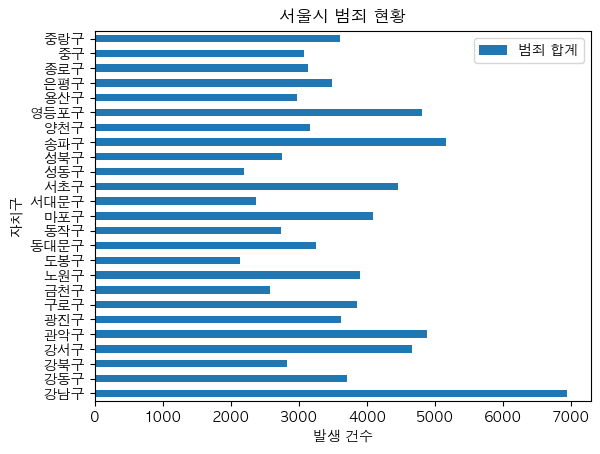

In [26]:
seoul_criminal.plot(kind='barh', y=['범죄 합계']);
plt.title('서울시 범죄 현황');
plt.xlabel('발생 건수');

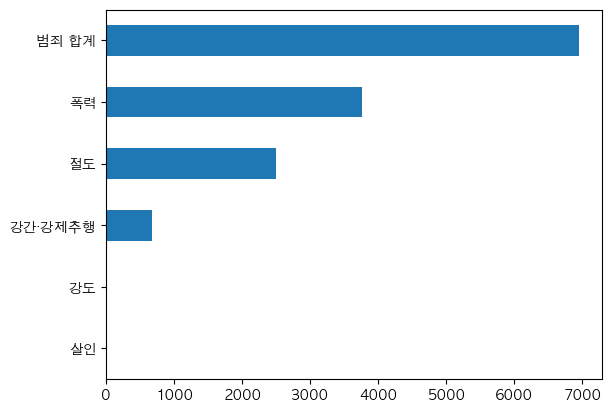

In [27]:
# 강남구에 대한 범죄 발생 현황
seoul_criminal.loc['강남구'].plot(kind='barh');

∴ 서울시에서는 강남구에서 5대 범죄가 제일 많이 발생한다.(폭력 범죄가 제일 많이 발생)

# 서울시 5대 범죄 발생 장소 현황

In [28]:
seoul_criminal_place = pd.read_csv('/Users/yeondyu/Desktop/Coding/Mon_Tue_Wed/dataset/criminal/5대범죄+발생장소별+현황_20240117090148.csv', header=2, index_col=1)
seoul_criminal_place

,범죄별(1),소계,아파트 연립다세대,단독주택,노상,상점,숙박업소 목욕탕,유흥접객업소,사무실,역 대합실,교통수단,유원지,학교,금융기관,기타
범죄별(2),,,,,,,,,,,,,,,
소계,계,90399,9781,7906,29320,10556,980,5939,1630,1073,2897,962,428,648,18279
살인,계,104,30,26,17,2,-,5,5,2,1,1,-,-,15
강도,계,117,12,11,39,16,2,6,5,1,2,-,-,1,22
강간강제추행,계,5816,551,578,950,191,277,679,152,178,829,68,47,4,1312
절도,계,37579,2886,1579,11442,8991,337,1684,420,348,1007,487,189,578,7631
폭력,계,46783,6302,5712,16872,1356,364,3565,1048,544,1058,406,192,65,9299


## 데이터 처리

In [29]:
seoul_criminal_place = seoul_criminal_place.drop(['범죄별(1)', '소계'], axis=1).T
seoul_criminal_place = seoul_criminal_place.drop('소계', axis=1).T
seoul_criminal_place = seoul_criminal_place.rename_axis(index={'범죄별(2)': '범죄별'})
seoul_criminal_place

,아파트 연립다세대,단독주택,노상,상점,숙박업소 목욕탕,유흥접객업소,사무실,역 대합실,교통수단,유원지,학교,금융기관,기타
범죄별,,,,,,,,,,,,,
살인,30,26,17,2,-,5,5,2,1,1,-,-,15
강도,12,11,39,16,2,6,5,1,2,-,-,1,22
강간강제추행,551,578,950,191,277,679,152,178,829,68,47,4,1312
절도,2886,1579,11442,8991,337,1684,420,348,1007,487,189,578,7631
폭력,6302,5712,16872,1356,364,3565,1048,544,1058,406,192,65,9299


In [30]:
# -로 입력되어 있는 데이터를 0으로 변경
seoul_criminal_place = seoul_criminal_place.replace('-', 0)
seoul_criminal_place = seoul_criminal_place.T
seoul_criminal_place

범죄별,살인,강도,강간강제추행,절도,폭력
아파트 연립다세대,30,12,551,2886,6302
단독주택,26,11,578,1579,5712
노상,17,39,950,11442,16872
상점,2,16,191,8991,1356
숙박업소 목욕탕,0,2,277,337,364
유흥접객업소,5,6,679,1684,3565
사무실,5,5,152,420,1048
역 대합실,2,1,178,348,544
교통수단,1,2,829,1007,1058
유원지,1,0,68,487,406


In [31]:
seoul_criminal_place.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 아파트 연립다세대 to 기타
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   살인      13 non-null     object
 1   강도      13 non-null     object
 2   강간강제추행  13 non-null     object
 3   절도      13 non-null     object
 4   폭력      13 non-null     object
dtypes: object(5)
memory usage: 1.2+ KB


In [32]:
# 데이터 타입을 숫자형으로 변경
seoul_criminal_place = seoul_criminal_place.astype('int')
seoul_criminal_place.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 아파트 연립다세대 to 기타
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   살인      13 non-null     int64
 1   강도      13 non-null     int64
 2   강간강제추행  13 non-null     int64
 3   절도      13 non-null     int64
 4   폭력      13 non-null     int64
dtypes: int64(5)
memory usage: 1.2+ KB


In [33]:
# 장소별 합계 구하기
seoul_criminal_place['합계'] = seoul_criminal_place.sum(axis=1)
seoul_criminal_place

범죄별,살인,강도,강간강제추행,절도,폭력,합계
아파트 연립다세대,30,12,551,2886,6302,9781
단독주택,26,11,578,1579,5712,7906
노상,17,39,950,11442,16872,29320
상점,2,16,191,8991,1356,10556
숙박업소 목욕탕,0,2,277,337,364,980
유흥접객업소,5,6,679,1684,3565,5939
사무실,5,5,152,420,1048,1630
역 대합실,2,1,178,348,544,1073
교통수단,1,2,829,1007,1058,2897
유원지,1,0,68,487,406,962


## 데이터 시각화

### 히트맵

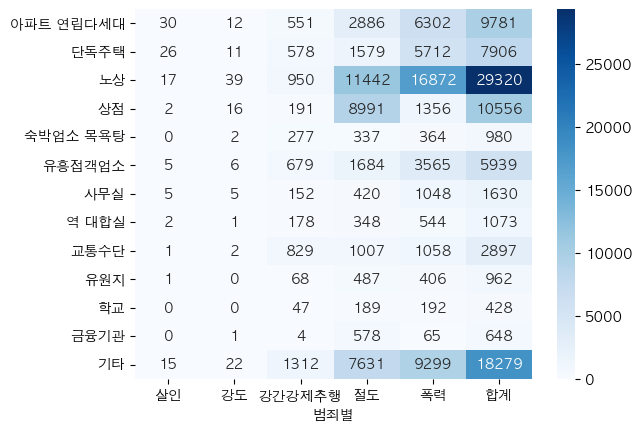

In [34]:
sns.heatmap(seoul_criminal_place, annot=True, fmt='.0f', cmap='Blues');

### 수평 막대 그래프

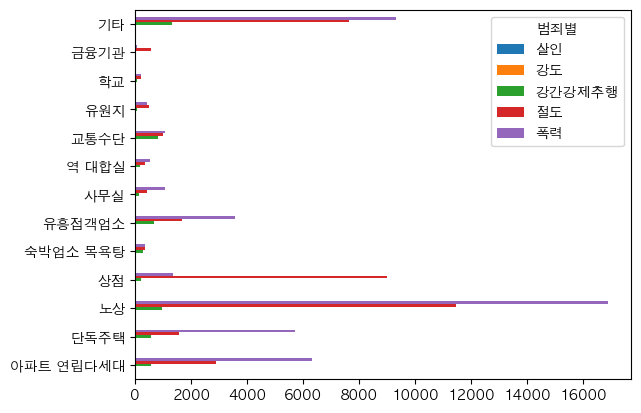

In [35]:
seoul_criminal_place.plot(kind='barh', y=['살인', '강도', '강간강제추행', '절도', '폭력']);

∴ 서울시에서 5대 범죄는 노상에서 제일 많이 발생한다. (폭력 범죄가 제일 많음)

# 서울시 CCTV 현황
: 방범용 CCTV가 적은 곳에서 범죄가 많이 발생하나?

In [36]:
seoul_cctv = pd.read_csv('/Users/yeondyu/Desktop/Coding/Mon_Tue_Wed/dataset/criminal/서울시 안심이 CCTV 연계 현황.csv', encoding='CP949', index_col=0)

seoul_cctv = seoul_cctv.drop(['CCTV 수량', '수정 일시'], axis=1)

seoul_cctv.head()

,안심 주소,위도,경도
자치구,,,
중랑구,중화2동 326-86 (주택가 골목삼거리)_C-JH02-0032,37.5977,127.0728
중랑구,면목2동 146-1(고정3)_C-MM02-0013-C,37.5879,127.0812
중랑구,중화2동 326-88 (골목길 통신주)_C-JH02-0032-1,37.5976,127.0727
중랑구,면목2동 146-1(고정2)_C-MM02-0013-B,37.5879,127.0812
중랑구,중화2동 327-27 (고정)_C-JH02-0044-A,37.5986,127.0747


## 데이터 처리

In [37]:
# 자치구별 CCTY 총수량
seoul_cctv_total = seoul_cctv.groupby('자치구').size()
seoul_cctv_total = seoul_cctv_total.reset_index(name = 'CCTY 총수량')
seoul_cctv_total.index = seoul_cctv_total['자치구']
seoul_cctv_total = seoul_cctv_total.drop('자치구', axis = 1)
seoul_cctv_total

,CCTY 총수량
자치구,
강남구,7007
강동구,3191
강북구,2858
강서구,3210
관악구,5366
광진구,4091
구로구,4050
금천구,2725
노원구,2655


In [38]:
# 자치구별 위도, 경도 평균값
seoul_cctv_latlog = seoul_cctv.groupby('자치구')[['위도', '경도']].mean()
seoul_cctv_latlog

,위도,경도
자치구,,
강남구,37.501856,127.051747
강동구,37.544679,127.141036
강북구,37.635253,127.023574
강서구,37.551925,126.838952
관악구,37.478549,126.936419
광진구,37.548030,127.082880
구로구,37.494683,126.864949
금천구,37.462116,126.901660
노원구,37.645818,127.069084


In [39]:
seoul_cctv = pd.concat([seoul_cctv_latlog, seoul_cctv_total], axis=1)
seoul_cctv

,위도,경도,CCTY 총수량
자치구,,,
강남구,37.501856,127.051747,7007
강동구,37.544679,127.141036,3191
강북구,37.635253,127.023574,2858
강서구,37.551925,126.838952,3210
관악구,37.478549,126.936419,5366
광진구,37.548030,127.082880,4091
구로구,37.494683,126.864949,4050
금천구,37.462116,126.901660,2725
노원구,37.645818,127.069084,2655


In [40]:
seoul_cctv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   위도        25 non-null     float64
 1   경도        25 non-null     float64
 2   CCTY 총수량  25 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 800.0+ bytes


## 데이터 시각화

### 수평 막대 그래프

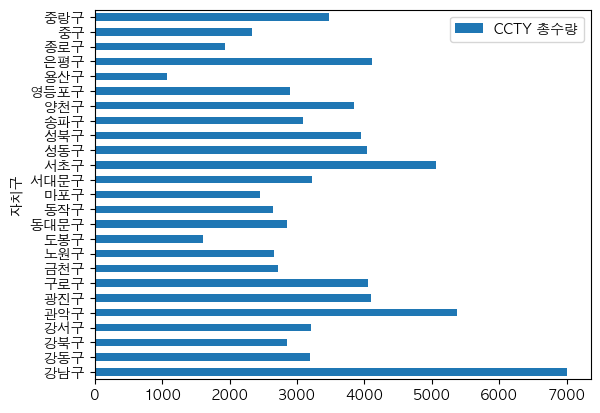

In [41]:
seoul_cctv_total.plot(kind='barh');

=> 강남구에 CCTV가 제일 많이 설치되어있음

## CCTV 수와 범죄 발생간의 관계

In [42]:
# CCTV 수와 범죄 데이터 합치기
cctv_criminal = pd.merge(seoul_criminal, seoul_cctv_total, on='자치구')
cctv_criminal = cctv_criminal.sort_values('자치구')
cctv_criminal

,살인,강도,강간·강제추행,절도,폭력,범죄 합계,CCTY 총수량
자치구,,,,,,,
강남구,12,11,667,2495,3762,6947,7007
강동구,5,5,157,1672,1872,3711,3191
강북구,5,5,177,872,1773,2832,2858
강서구,3,7,261,1991,2401,4663,3210
관악구,10,9,327,1966,2567,4879,5366
광진구,6,0,230,1670,1713,3619,4091
구로구,11,8,217,1565,2056,3857,4050
금천구,2,3,127,1118,1327,2577,2725
노원구,3,3,180,1504,2206,3896,2655


### 데이터 시각화

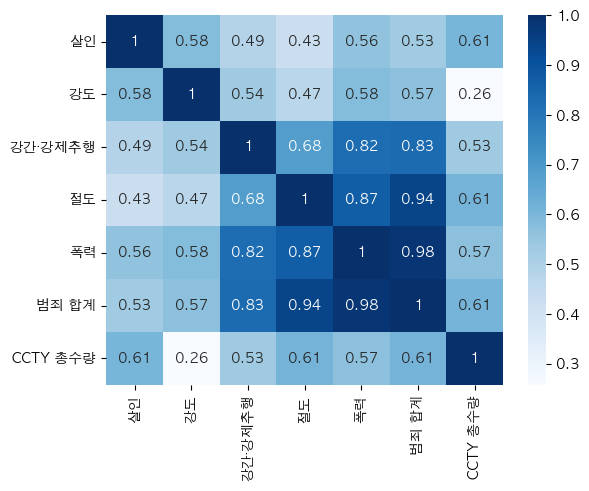

In [43]:
sns.heatmap(cctv_criminal.corr(), annot=True, cmap='Blues');

=> CCTV 총수량과 범죄 합계는 상관계수가 0.61로 다소 높은 상관관계를 가지고 있음

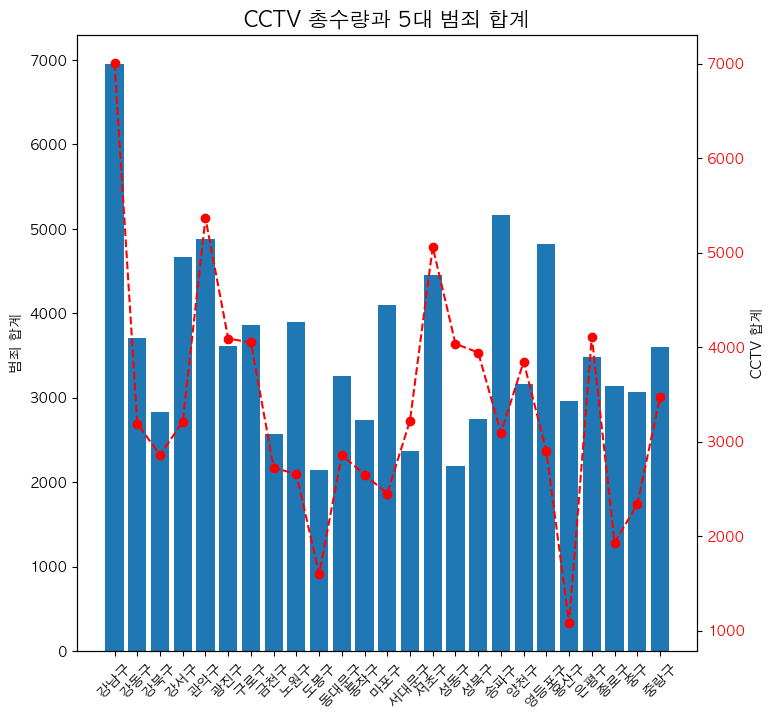

In [44]:
fig, ax1 = plt.subplots(figsize=(8, 8))
# 범죄 합계
ax1.bar(seoul_criminal.index, seoul_criminal['범죄 합계']);
ax1.set_ylabel('범죄 합계');
plt.xticks(rotation=45);

# CCTV 총수량
ax2 = ax1.twinx();
ax2.plot(seoul_cctv_total.index, seoul_cctv_total, '--o', color='red');
ax2.set_ylabel('CCTV 합계');
ax2.tick_params(axis = 'y', labelcolor = 'r');

plt.title('CCTV 총수량과 5대 범죄 합계', fontsize=15);

∴ 대부분 범죄가 많이 발생하는 곳에 CCTV가 많이 설치되어 있다.

# 서울시 인구
: 인수 수가 많은곳에서 범죄가 많이 발생하나?

In [45]:
seoul_pop = pd.read_csv('/Users/yeondyu/Desktop/Coding/Mon_Tue_Wed/dataset/criminal/주민등록인구(연령별_동별)_20240117090229.csv', header=1, index_col=0)
seoul_pop

,동별(2),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
동별(1),,,,,,,,,,,,,,,,,,,,,
합계,소계,계,9667669,232724,323365,366579,394995,621697,844569,782681,...,713186,729540,585417,410611,305700,219981,101884,34635,7864,1319
합계,소계,한국인,9428372,227619,317698,362502,386616,578374,811109,758697,...,690974,717931,579856,408481,305015,219561,101648,34536,7818,1292
합계,소계,외국인,239297,5105,5667,4077,8379,43323,33460,23984,...,22212,11609,5561,2130,685,420,236,99,46,27
종로구,소계,계,152211,2694,4100,4930,5948,13088,14547,11419,...,11928,11688,9047,6251,5237,4358,2117,729,190,29
종로구,소계,한국인,141379,2512,3891,4718,5369,9563,12721,10553,...,11471,11399,8902,6184,5220,4345,2109,725,190,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
송파구,소계,한국인,658801,18972,27148,29448,28904,36028,51377,54057,...,47165,48669,40230,26479,17679,10915,5398,2078,499,83
송파구,소계,외국인,5713,124,136,79,89,332,716,769,...,622,303,131,50,14,11,4,1,1,-
강동구,소계,계,464037,13978,18774,20061,19155,24473,34262,35429,...,34002,37600,30372,20346,13373,8457,3860,1519,342,71


## 데이터 처리

In [46]:
seoul_pop = seoul_pop.loc[::3]
seoul_pop = seoul_pop[['합계']]
seoul_pop = seoul_pop.drop('합계')
seoul_pop = seoul_pop.rename_axis(index={'동별(1)': '자치구'})
seoul_pop = seoul_pop.sort_index()
seoul_pop = seoul_pop.rename(columns={'합계':'인구 합계'})
seoul_pop

,인구 합계
자치구,
강남구,534103
강동구,464037
강북구,297702
강서구,574638
관악구,501226
광진구,351252
구로구,418418
금천구,242818
노원구,508014


In [47]:
jongno_gu = seoul_pop.loc['종로구'].sum()
jung_gu = seoul_pop.loc['중구'].sum()

In [48]:
seoul_pop = seoul_pop.drop(['종로구', '중구'])
seoul_pop.loc['종로구'] = jongno_gu
seoul_pop.loc['중구'] = jung_gu
seoul_pop

,인구 합계
자치구,
강남구,534103
강동구,464037
강북구,297702
강서구,574638
관악구,501226
광진구,351252
구로구,418418
금천구,242818
노원구,508014


In [49]:
seoul_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중구
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   인구 합계   25 non-null     int64
dtypes: int64(1)
memory usage: 400.0+ bytes


## 데이터 시각화

### 수평 막대 그래프

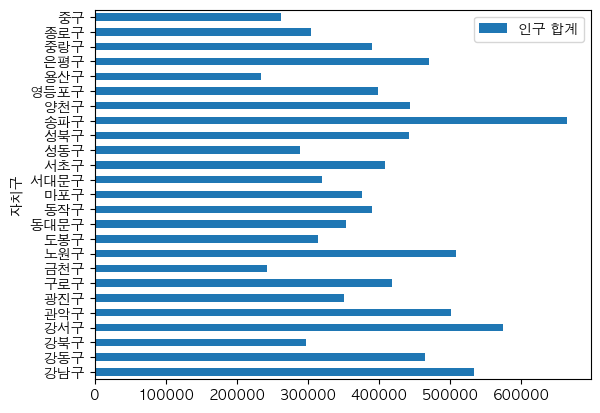

In [50]:
seoul_pop.plot(kind='barh');

=> 송파구에 인구가 제일 많음

## 인구수와 범죄 발생간의 관계

In [51]:
# 인구수와 범죄 데이터 합치기
pop_criminal = pd.merge(seoul_criminal, seoul_pop, on='자치구')
pop_criminal = pop_criminal.sort_values('자치구')
pop_criminal

,살인,강도,강간·강제추행,절도,폭력,범죄 합계,인구 합계
자치구,,,,,,,
강남구,12,11,667,2495,3762,6947,534103
강동구,5,5,157,1672,1872,3711,464037
강북구,5,5,177,872,1773,2832,297702
강서구,3,7,261,1991,2401,4663,574638
관악구,10,9,327,1966,2567,4879,501226
광진구,6,0,230,1670,1713,3619,351252
구로구,11,8,217,1565,2056,3857,418418
금천구,2,3,127,1118,1327,2577,242818
노원구,3,3,180,1504,2206,3896,508014


### 데이터 시각화

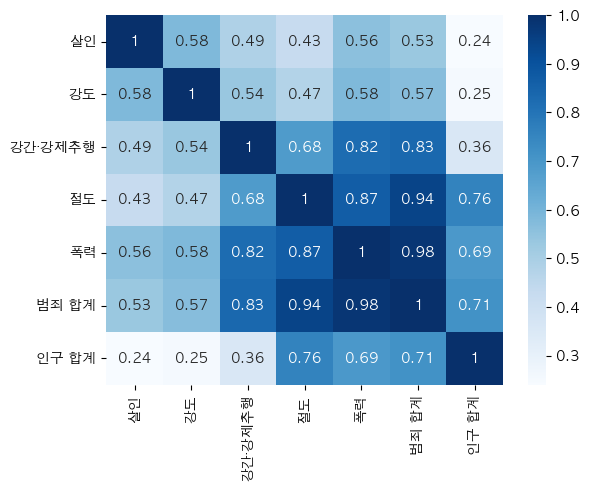

In [52]:
sns.heatmap(pop_criminal.corr(), annot=True, cmap='Blues');

=> 인구수와 범죄 합계는 상관계수가 0.71로 높은 상관관계를 가지고 있음

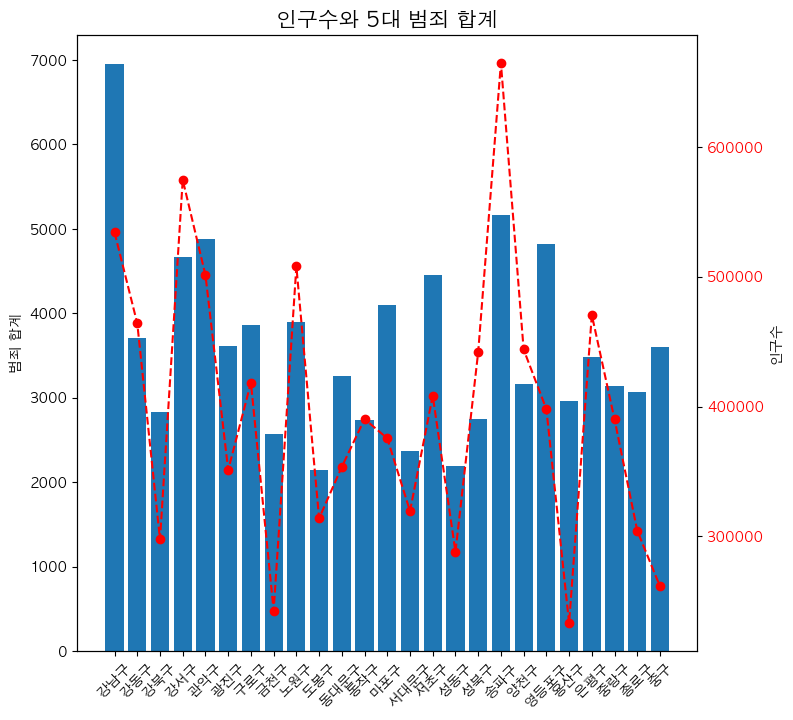

In [53]:
fig, ax1 = plt.subplots(figsize=(8, 8))
# 범죄 합계
ax1.bar(seoul_criminal.index, seoul_criminal['범죄 합계']);
ax1.set_ylabel('범죄 합계');
plt.xticks(rotation=45);

# 인구수
ax2 = ax1.twinx();
ax2.plot(seoul_pop.index, seoul_pop, '--o', color='red');
ax2.set_ylabel('인구수');
ax2.tick_params(axis = 'y', labelcolor = 'r');

plt.title('인구수와 5대 범죄 합계', fontsize=15);

∴ 인구가 많은 곳에서 범죄가 많이 발생한다.

# 분석 결과

## 전국
- 전국적으로 5대 범죄(살인, 강도, 강간·강제추행, 절도, 폭력) 중 폭력 범죄가 제일 많이 발생했다.  
- 경기도 > 서울 > 부산 순으로 5대 범죄가 많이 발생했다.

## 서울
: 서울시 데이터가 많아 더 자세하게 분석하기로 결정했다.  

- 서울시 내에서는 강남구에서 5대 범죄가 제일 많이 발생했다. (그 중 폭력 범죄가 제일 많음)  
- 강남구 > 송파구 > 관악구 > 영등포구 > 강서구 순으로 5대 범죄가 많이 발생했다.<br><br>
- 노상에서 5대 범죄가 제일 많이 발생했다.<br><br>
- 강남구 > 관악구	> 서초구 > 은평구 > 광진구 순으로 CCTV가 많이 설치되어 있다.  
- 서울시 CCTV 총수량과 5대 범죄 발생은 상관계수가 0.61로 다소 높은 상관관계를 가지고 있어 범죄 발생과 CCTV는 상관이 있어 보인다.<br><br>
- 송파구 > 강서구 > 강남구 > 노원구 > 관악구 순으로 인구수가 많다.  
- 서울시 인구수와 5대 범죄 발생은 상관계수가 0.71로 높은 상관관계를 가지고 있어 범죄 발생과 인구수는 상관이 있어 보인다.  